In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
dataset=pd.read_csv('/content/Salary_Data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [35]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Here we can see that only one independent varibale is present so feature scaling is not required

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


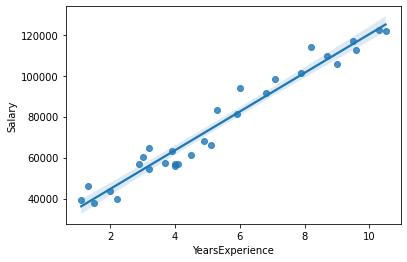

In [36]:
sns.regplot(dataset['YearsExperience'],dataset['Salary'])

**EDA**

Here there is linear relationship between them so we can use linear regression 

In [37]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


Here we can infer that only 30 data points are there and there is no missing values

Visualization of missing values

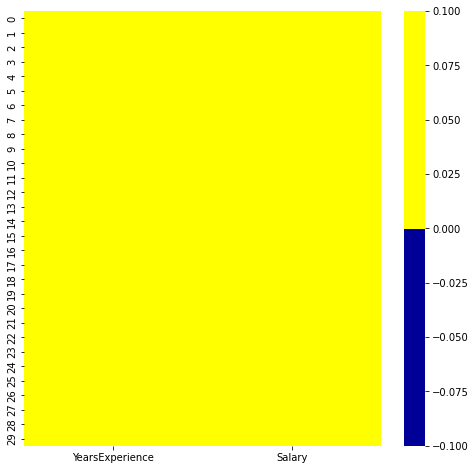

In [38]:
cols=dataset.columns
color=['#000099','#ffff00']
fig=plt.figure(figsize=(8,8))
sns.heatmap(dataset[cols].isnull(),cmap=sns.color_palette(color))

Outlier detection

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


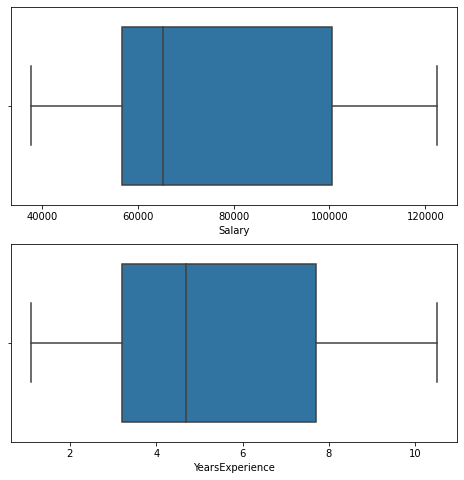

In [39]:
fig=plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
sns.boxplot(dataset['Salary'])
plt.subplot(2,1,2)
sns.boxplot(dataset['YearsExperience'])

Here based on the box plot we can infer that there is no outlier in each of the data set

Histplot -to find the distibution of the data set

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


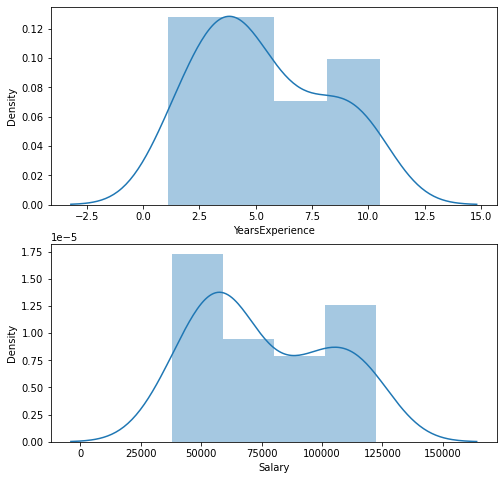

In [40]:
fig=plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
sns.distplot(dataset['YearsExperience'])
plt.subplot(2,1,2)
sns.distplot(dataset['Salary'])

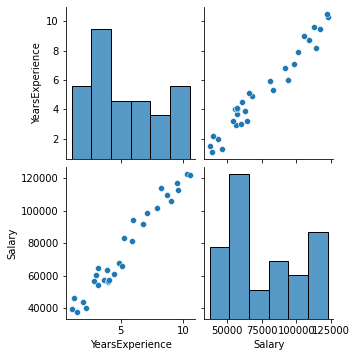

In [41]:
sns.pairplot(dataset)

In [42]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


We have completed the EDA process


sorting dependent and independent varibale

In [43]:
X=dataset.iloc[:,0].values
y=dataset.iloc[:,1].values

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)

In [45]:
X_train

array([ 9.6,  4. ,  5.3,  7.9,  2.9,  5.1,  3.2,  4.5,  8.2,  6.8,  1.3,
       10.5,  3. ,  2.2,  5.9,  6. ,  3.7,  3.2,  9. ,  2. ,  1.1,  7.1,
        4.9,  4. ])

In [46]:
X_train.shape

(24,)

In [47]:
X_test

array([ 1.5, 10.3,  4.1,  3.9,  9.5,  8.7])

In [48]:
y_train

array([112635.,  55794.,  83088., 101302.,  56642.,  66029.,  64445.,
        61111., 113812.,  91738.,  46205., 121872.,  60150.,  39891.,
        81363.,  93940.,  57189.,  54445., 105582.,  43525.,  39343.,
        98273.,  67938.,  56957.])

In [49]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431.])

Fitting the model

In [50]:
import statsmodels.formula.api as smf
model1=smf.ols('y~X',data=dataset).fit()

In [51]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 22 Jul 2022   Prob (F-statistic):           1.14e-20
Time:                        09:21:09   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
X           9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


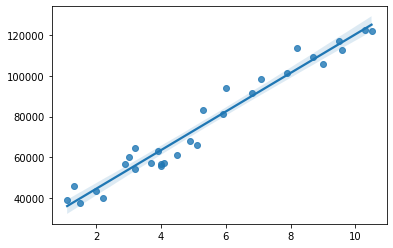

In [52]:
sns.regplot(X,y)

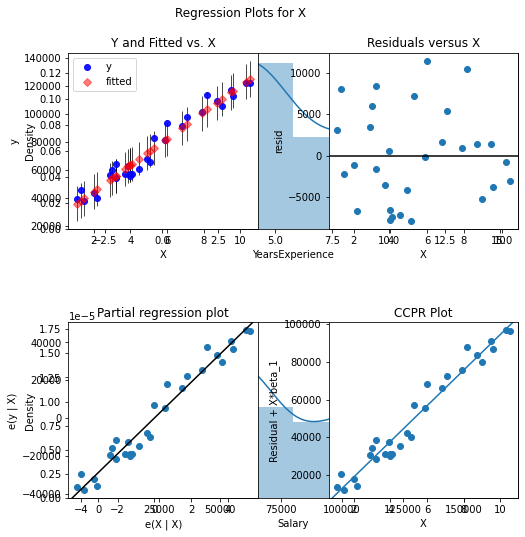

In [53]:
# creating regression plots
import statsmodels.api as sm
fig = sm.graphics.plot_regress_exog(model1,'X',fig=fig)
fig

Let us now try tansforming the data set

**Log Transformation**

In [55]:
X2=np.log(dataset.iloc[:,0].values)
y2=np.log(dataset.iloc[:,1].values)

In [57]:
X2

array([0.09531018, 0.26236426, 0.40546511, 0.69314718, 0.78845736,
       1.06471074, 1.09861229, 1.16315081, 1.16315081, 1.30833282,
       1.36097655, 1.38629436, 1.38629436, 1.41098697, 1.5040774 ,
       1.58923521, 1.62924054, 1.66770682, 1.77495235, 1.79175947,
       1.91692261, 1.96009478, 2.06686276, 2.10413415, 2.16332303,
       2.19722458, 2.2512918 , 2.2617631 , 2.3321439 , 2.35137526])

In [58]:
y2

array([10.58007335, 10.7408433 , 10.53823732, 10.68109076, 10.59390601,
       10.94450604, 11.00459672, 10.9049463 , 11.07356743, 10.95411685,
       11.05434435, 10.92942162, 10.95005188, 10.95222659, 11.02044716,
       11.1263508 , 11.09784932, 11.32765557, 11.3066759 , 11.45041156,
       11.42669197, 11.4955046 , 11.52586143, 11.64230324, 11.60304949,
       11.56724318, 11.66966422, 11.63190778, 11.71497612, 11.71072659])

Splitting the dataset

In [59]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=.2,random_state=0)

In [60]:
X2_train

array([2.2617631 , 1.38629436, 1.66770682, 2.06686276, 1.06471074,
       1.62924054, 1.16315081, 1.5040774 , 2.10413415, 1.91692261,
       0.26236426, 2.35137526, 1.09861229, 0.78845736, 1.77495235,
       1.79175947, 1.30833282, 1.16315081, 2.19722458, 0.69314718,
       0.09531018, 1.96009478, 1.58923521, 1.38629436])

In [61]:
X2_test

array([0.40546511, 2.3321439 , 1.41098697, 1.36097655, 2.2512918 ,
       2.16332303])

In [62]:
y2_test

array([10.53823732, 11.71497612, 10.95222659, 11.05434435, 11.66966422,
       11.60304949])

In [63]:
y2_train

array([11.63190778, 10.92942162, 11.32765557, 11.52586143, 10.94450604,
       11.09784932, 11.07356743, 11.02044716, 11.64230324, 11.42669197,
       10.7408433 , 11.71072659, 11.00459672, 10.59390601, 11.3066759 ,
       11.45041156, 10.95411685, 10.9049463 , 11.56724318, 10.68109076,
       10.58007335, 11.4955046 , 11.1263508 , 10.95005188])

In [67]:
model2=smf.ols('y2~X2',data=dataset).fit()

In [68]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                     y2   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Fri, 22 Jul 2022   Prob (F-statistic):           7.40e-16
Time:                        09:26:58   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3280      0.056    184.868      0.0

It is observed that the r square and adjusted r square is droping compared to the above case

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


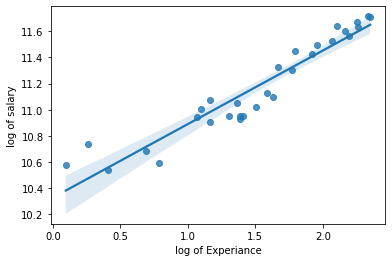

In [78]:
plt.xlabel('log of Experiance')
plt.ylabel('log of salary')
sns.regplot(X2,y2)

**square root transformation**

In [84]:
X3=np.sqrt(dataset.iloc[:,0].values)
y3=np.sqrt(dataset.iloc[:,1].values)

In [85]:
X3

array([1.04880885, 1.14017543, 1.22474487, 1.41421356, 1.4832397 ,
       1.70293864, 1.73205081, 1.78885438, 1.78885438, 1.92353841,
       1.97484177, 2.        , 2.        , 2.02484567, 2.12132034,
       2.21359436, 2.25831796, 2.30217289, 2.42899156, 2.44948974,
       2.60768096, 2.66458252, 2.81069386, 2.86356421, 2.94957624,
       3.        , 3.082207  , 3.09838668, 3.20936131, 3.24037035])

In [86]:
y3

array([198.35069952, 214.95348334, 194.24469105, 208.62646045,
       199.72731411, 237.99579828, 245.25496937, 233.33452381,
       253.86019775, 239.1422171 , 251.43189933, 236.20753587,
       238.65665715, 238.91630334, 247.2063915 , 260.64918952,
       256.96108655, 288.24989159, 285.24200252, 306.4963295 ,
       302.88281562, 313.48524686, 318.27975116, 337.36034147,
       330.80356709, 324.93383942, 342.00730986, 335.61138241,
       349.84425106, 349.10170438])

Splitting the dataset

In [87]:
X3_train,X3_test,y3_train,y3_test=train_test_split(X3,y3)

In [88]:
X3_train

array([2.21359436, 2.42899156, 2.81069386, 1.22474487, 3.20936131,
       3.082207  , 2.66458252, 2.        , 1.92353841, 3.        ,
       2.86356421, 2.30217289, 1.97484177, 2.12132034, 2.44948974,
       1.14017543, 1.4832397 , 3.24037035, 1.78885438, 1.73205081,
       1.70293864, 1.04880885])

In [89]:
X3_test

array([2.94957624, 2.        , 2.25831796, 2.60768096, 2.02484567,
       3.09838668, 1.41421356, 1.78885438])

In [90]:
model3=smf.ols('y3~X3',data=dataset).fit()

In [91]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                     y3   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Fri, 22 Jul 2022   Prob (F-statistic):           7.58e-19
Time:                        09:41:02   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    103.5680      8.178     12.663      0.0

In [ ]:
#Here r square is 94% which still 1% lower than the intial model

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


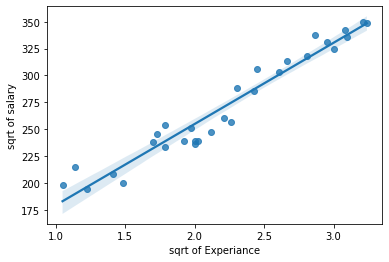

In [92]:
plt.xlabel('sqrt of Experiance')
plt.ylabel('sqrt of salary')
sns.regplot(X3,y3)

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/regressionplots.py:221: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(2, 2, 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/regressionplots.py:231: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(2, 2, 2)
/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/regressionplots.py:238: MatplotlibDeprecationWarning

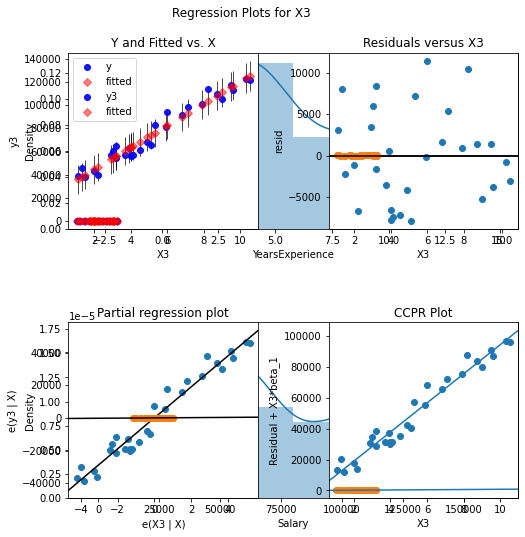

In [93]:
fig = sm.graphics.plot_regress_exog(model3,'X3',fig=fig)
fig

**Square transformation**

In [94]:
X4=(dataset.iloc[:,0].values)**2
y4=(dataset.iloc[:,1].values)**2

In [95]:
X4

array([  1.21,   1.69,   2.25,   4.  ,   4.84,   8.41,   9.  ,  10.24,
        10.24,  13.69,  15.21,  16.  ,  16.  ,  16.81,  20.25,  24.01,
        26.01,  28.09,  34.81,  36.  ,  46.24,  50.41,  62.41,  67.24,
        75.69,  81.  ,  90.25,  92.16, 106.09, 110.25])

In [96]:
y4

array([1.54787165e+09, 2.13490202e+09, 1.42362836e+09, 1.89442562e+09,
       1.59129188e+09, 3.20831616e+09, 3.61802250e+09, 2.96425802e+09,
       4.15315802e+09, 3.27058172e+09, 3.99651552e+09, 3.11297044e+09,
       3.24409985e+09, 3.25824056e+09, 3.73455432e+09, 4.61557184e+09,
       4.35982884e+09, 6.90361574e+09, 6.61993777e+09, 8.82472360e+09,
       8.41586064e+09, 9.65758253e+09, 1.02620952e+10, 1.29531713e+10,
       1.19751438e+10, 1.11475587e+10, 1.36817470e+10, 1.26866432e+10,
       1.49795569e+10, 1.48527844e+10])

Splitting the data set

In [100]:
X4_train,X4_test,y4_train,y4_test=train_test_split(X4,y4,test_size=.2,random_state=0)

In [101]:
X4_train

array([ 92.16,  16.  ,  28.09,  62.41,   8.41,  26.01,  10.24,  20.25,
        67.24,  46.24,   1.69, 110.25,   9.  ,   4.84,  34.81,  36.  ,
        13.69,  10.24,  81.  ,   4.  ,   1.21,  50.41,  24.01,  16.  ])

In [102]:
X4_test

array([  2.25, 106.09,  16.81,  15.21,  90.25,  75.69])

Fitting the model

In [105]:
model4=smf.ols('y4~X4',data=dataset).fit()

In [106]:
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                     y4   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     581.9
Date:                Fri, 22 Jul 2022   Prob (F-statistic):           2.82e-20
Time:                        09:55:40   Log-Likelihood:                -662.35
No. Observations:                  30   AIC:                             1329.
Df Residuals:                      28   BIC:                             1331.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.866e+09   2.61e+08      7.138      0.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


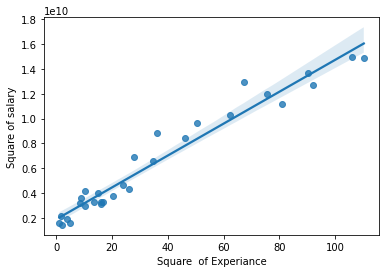

In [108]:
plt.xlabel('Square  of Experiance')
plt.ylabel('Square of salary')
sns.regplot(X4,y4)

Let us try inverse transformation

In [109]:
X5=1/(dataset.iloc[:,0].values)
y5=1/(dataset.iloc[:,1].values)

In [110]:
X5

array([0.90909091, 0.76923077, 0.66666667, 0.5       , 0.45454545,
       0.34482759, 0.33333333, 0.3125    , 0.3125    , 0.27027027,
       0.25641026, 0.25      , 0.25      , 0.24390244, 0.22222222,
       0.20408163, 0.19607843, 0.18867925, 0.16949153, 0.16666667,
       0.14705882, 0.14084507, 0.12658228, 0.12195122, 0.11494253,
       0.11111111, 0.10526316, 0.10416667, 0.09708738, 0.0952381 ])

In [111]:
y5

array([2.54174821e-05, 2.16426794e-05, 2.65034057e-05, 2.29753016e-05,
       2.50683111e-05, 1.76547438e-05, 1.66251039e-05, 1.83671595e-05,
       1.55171076e-05, 1.74858802e-05, 1.58182796e-05, 1.79230742e-05,
       1.75571045e-05, 1.75189643e-05, 1.63636661e-05, 1.47193029e-05,
       1.51448606e-05, 1.20354323e-05, 1.22905989e-05, 1.06450926e-05,
       1.09006083e-05, 1.01757349e-05, 9.87147342e-06, 8.78641971e-06,
       9.13817840e-06, 9.47131140e-06, 8.54927374e-06, 8.87823501e-06,
       8.17053542e-06, 8.20533018e-06])

Spliting the dataset

In [112]:
X5_train,X5_test,y5_train,y5_test=train_test_split(X5,y5,test_size=.2,random_state=0)

In [113]:
X5_train

array([0.10416667, 0.25      , 0.18867925, 0.12658228, 0.34482759,
       0.19607843, 0.3125    , 0.22222222, 0.12195122, 0.14705882,
       0.76923077, 0.0952381 , 0.33333333, 0.45454545, 0.16949153,
       0.16666667, 0.27027027, 0.3125    , 0.11111111, 0.5       ,
       0.90909091, 0.14084507, 0.20408163, 0.25      ])

In [114]:
X5_test

array([0.66666667, 0.09708738, 0.24390244, 0.25641026, 0.10526316,
       0.11494253])

In [115]:
y5_train

array([8.87823501e-06, 1.79230742e-05, 1.20354323e-05, 9.87147342e-06,
       1.76547438e-05, 1.51448606e-05, 1.55171076e-05, 1.63636661e-05,
       8.78641971e-06, 1.09006083e-05, 2.16426794e-05, 8.20533018e-06,
       1.66251039e-05, 2.50683111e-05, 1.22905989e-05, 1.06450926e-05,
       1.74858802e-05, 1.83671595e-05, 9.47131140e-06, 2.29753016e-05,
       2.54174821e-05, 1.01757349e-05, 1.47193029e-05, 1.75571045e-05])

In [116]:
y5_test

array([2.65034057e-05, 8.17053542e-06, 1.75189643e-05, 1.58182796e-05,
       8.54927374e-06, 9.13817840e-06])

In [117]:
model5=smf.ols('y5~X5',data=dataset).fit()

In [118]:
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                     y5   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     93.95
Date:                Fri, 22 Jul 2022   Prob (F-statistic):           1.91e-10
Time:                        10:08:39   Log-Likelihood:                 343.31
No. Observations:                  30   AIC:                            -682.6
Df Residuals:                      28   BIC:                            -679.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.488e-06    8.3e-07     10.227      0.0

Here from the r square and adjusted r square  we can infer that this model is not that good compared to rest

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


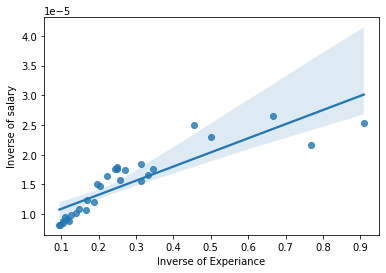

In [120]:
plt.xlabel('Inverse of Experiance')
plt.ylabel('Inverse of salary')
sns.regplot(X5,y5)

Here from all the model the non transformed model and sqaure transformed data are having the highest values

#best fit line y=mx+c
y=X*1.287e+08   +1.866e+09          
where y is the salary to be predicted and X is the year of Experiance